In [7]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import sys
#sys.path.insert(0,'../source/')

In [8]:
import kftneutrinos
from kftneutrinos import py_first_order, py_first_integrand_y
from kftneutrinos import py_second_order, py_second_integrand_z1z2

In [9]:
# The textwidth should be that of your TeX document, in pts (points).
# To get it, place
#   \showthe\textwidth
# inside your TeX document, recompile and search the logs.
# To grab it directly, compile your document using
#   pdflatex -interaction=nonstopmode document.tex | grep '>.*pt\.'
height = 2
fontsize = 11/1.2
fontsize = 11/1.2*4
cm = 1/2.54  # centimeters in inches
width = 8.6*cm # PRL figure width

latex_preamble = r'''
    \usepackage{lmodern}
    \usepackage{amsmath}
    \usepackage{amsfonts}
    \usepackage{mathtools}
    \usepackage{siunitx}
'''
matplotlib.rcParams.update({
    'text.usetex'        : True,
    'font.family'        : 'serif',
    'font.serif'         : 'cmr10',
    'font.size'          : fontsize,
    'mathtext.fontset'   : 'cm',
    'text.latex.preamble': latex_preamble,
})
Hubbles_to_Gyr = 0.001022

**-------Input-------**

In [103]:
r_here = 8.0
z_ini = 3.0
Tnu = 0.0001676375864435959

masses = [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.3]
masses = [0.005, 0.05, 0.1, 0.3]
# masses = np.logspace(-4, -0.2, 15)

Gauss_Laguerre = 80
rtols = np.array([1e-7, 1e-5, 1e-5])
atols = np.array([1e-35, 1e-35, 1e-35])

rtols_2 = np.array([1e-5, 1e-4, 1e-4, 1e-4])
atols_2 = np.array([1e-35, 1e-35, 1e-35, 1e-35])

In [5]:
int_free_analytical = 4*np.pi*1.803*Tnu**3
print(f"The analytical free integral is {int_free_analytical:.12}.")

The analytical free integral is 1.06738178968e-10.


## Plots

In [6]:
mertsch = {}
mertsch_data_labels = ['nfw', 'nfw_baryons', 'nfw_baryons_virgo', 'nfw_baryons_virgo_andromeda']
for label in mertsch_data_labels:
    mertsch[label] = np.genfromtxt('../data/mertsch_'+label+'.txt', delimiter=', ')

# First order only

In [7]:
first_list = []
tic = time()
for mass in masses:
    val = py_first_order(mass, z_ini, rtols, atols, r_here, Gauss_Laguerre, Tnu)
    first_list.append(val)
toc = time()
print(f"Computed {len(masses)} 1PT values in {toc - tic:.5} seconds.")
first = np.array(first_list)/int_free_analytical

Computed 4 1PT values in 0.22962 seconds.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_18743/47491237.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[width, height])


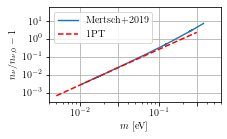

In [8]:
masses = np.array(masses)

fig, ax = plt.subplots(1, 1, figsize=[width, height])
ax.plot(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], '-', lw=1.4, label=f"Mertsch+2019")
ax.plot(masses, first, 'r--', markersize=8, label='1PT')
ax.set(xlabel=r'$m$ [eV]', ylabel=r'$n_\nu / n_{\nu,0} - 1$', xscale='log', yscale='log', xlim=[4e-3, 6e-1], ylim=[3e-4, 6e+1], xticks=[1e-2, 3e-2, 1e-1, 3e-1], yticks=[1e-3, 1e-2, 1e-1, 1e-0, 1e+1])
ax.grid()
#ax.axvline(x=0.06, label='minimum mass')
ax.legend(frameon=True)
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('first.pdf')

In [9]:
#ylist = np.linspace(0.00001, 20, 100)
ylist = np.logspace(-5, 3, 1000)
rtols_y = np.array([1e-8, 1e-8])
atols_y = np.array([1e-35, 1e-35])
masses_y = [0.05, 0.1, 0.3]
integrands = []
for mass in masses_y:
    new_list = []
    for y in ylist:
        new_integrand = py_first_integrand_y(y, mass, z_ini, rtols_y, atols_y, r_here, Gauss_Laguerre, Tnu)
        new_list.append(new_integrand)
    integrands.append(new_list)

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_18743/265502864.py:2: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[width, height])
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_18743/265502864.py:7: RuntimeWarning: overflow encountered in exp
  ax.plot(ylist, 4e-10/(1 + np.exp(ylist)), 'k--', lw=0.8, label='Fermi-Dirac')


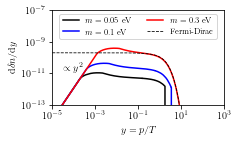

In [10]:
colors = ['k', 'b', 'r']
fig, ax = plt.subplots(1, 1, figsize=[width, height])
for idx, mass in enumerate(masses_y):
    ax.plot(ylist, integrands[idx], '-', color=colors[idx], label=fr"$m={mass}$ eV")
ax.set(xlim=[np.min(ylist), np.max(ylist)], xlabel=r'$y=p/T$', ylabel=r'$\mathrm{d} \delta n /\mathrm{d}y$', 
       xscale='log', yscale='log', ylim=[1e-13, 1e-7])
ax.plot(ylist, 4e-10/(1 + np.exp(ylist)), 'k--', lw=0.8, label='Fermi-Dirac')
ax.grid(False); ax.legend(loc='upper center', ncol=2, fontsize=8)
ax.text(3e-5, 1.5e-11, r'$\propto y^2$')
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('first_y.pdf')

# With second order

In [11]:
second_list = []
tic = time()
for mass in masses:
    val2 = py_second_order(mass, z_ini, rtols_2, atols_2, r_here, Gauss_Laguerre, Tnu)
    second_list.append(val2)
toc = time()
print(f"Computed {len(masses)} 2PT values in {toc - tic:.5} seconds.")
second = (np.array(first_list) + np.array(second_list))/int_free_analytical

Computed 4 2PT values in 13.551 seconds.


/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_18743/2171121895.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[10, 6])


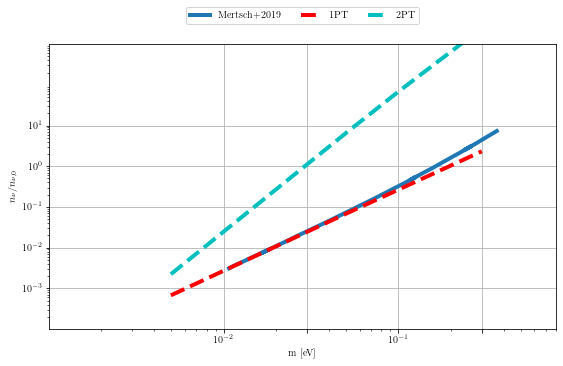

In [12]:
masses = np.array(masses)
lwidth=4
#fig, ax = plt.subplots(1, 1, figsize=[width, height])
fig, ax = plt.subplots(1, 1, figsize=[10, 6])
ax.plot(mertsch['nfw'][:, 0]*1e-3, mertsch['nfw'][:, 1], '-', label=f"Mertsch+2019", lw=lwidth)
ax.plot(masses, first, 'r--', markersize=8, label='1PT', lw=lwidth)
ax.plot(masses, second, 'c--', markersize=8, label='2PT', lw=lwidth)
ax.set(xlabel='m [eV]', ylabel=r'$n_\nu / n_{\nu,0}$', xscale='log', yscale='log', xlim=[1e-3, 8e-1], ylim=[1e-4, 1e+3], xticks=[1e-2, 3e-2, 1e-1, 3e-1], yticks=[1e-3, 1e-2, 1e-1, 1e-0, 1e+1])
#ax.axvline(x=0.06, label='minimum mass')
ax.legend(frameon=True, bbox_to_anchor=(0.5, 1.1), ncol=3, loc='center')
ax.grid()
fig.subplots_adjust(bottom=0.2205, left=0.195)
fig.savefig('second.pdf')

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_6283/2694921806.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=[10, 6])
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_6283/2694921806.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax.set(xlabel='m [eV]', ylabel='second/first', xscale='log', yscale='linear')


[Text(0.5, 0, 'm [eV]'), Text(0, 0.5, 'second/first'), None, None]

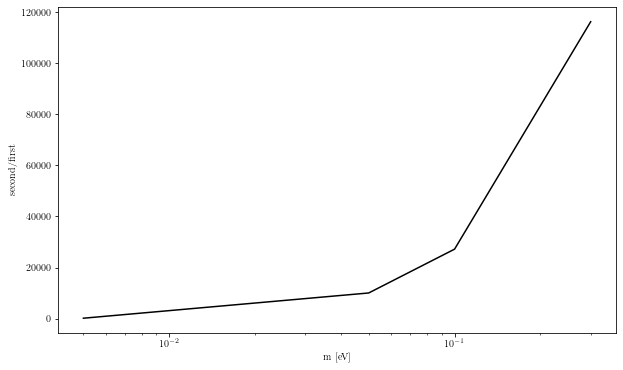

In [13]:
fig, ax = plt.subplots(1, 1, figsize=[10, 6])
ax.plot(masses, second/first, 'k-')
ax.set(xlabel='m [eV]', ylabel='second/first', xscale='log', yscale='linear')

# Second order integrands

In [129]:
rtols_2 = np.array([1e-8, 1e-6, 1e-6, 1e-6])

z2list = np.linspace(0.0, 2., 500)
z1list = z2list

mass = 0.2

integrand_matrix = np.zeros((len(z2list), len(z1list)))

for idx_z2 in range(len(z2list)):
    for idx_z1 in range(len(z1list)):
        # print(f"{idx_z2=}, z2={z2list[idx_z2]}, {idx_z1=}, z1={z1list[idx_z1]}")
#        integrand_matrix[idx_z2, idx_z1] = 1 if idx_z2==idx_z1 else 0
        new_integrand = py_second_integrand_z1z2(z2list[idx_z2], z1list[idx_z1], mass, z_ini, rtols_2, atols_2, r_here, Gauss_Laguerre, Tnu)
        integrand_matrix[idx_z2, idx_z1] = new_integrand
integrand_matrix = np.abs(integrand_matrix)

/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_98898/2716506661.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(2*width, 2*height))
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_98898/2716506661.py:3: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(integrand_matrix), origin='lower',extent=[min(z2list), max(z2list), min(z1list), max(z2list)], aspect='equal')
/var/folders/zr/zbvzsdtx4kzb3_fpksfqd3xx5jyp_x/T/ipykernel_98898/2716506661.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im)


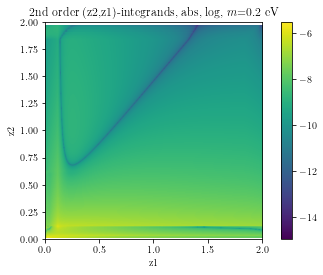

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(2*width, 2*height))
ax.set_title(f'2nd order (z2,z1)-integrands, abs, log, $m$={mass} eV')
im = ax.imshow(np.log10(integrand_matrix), origin='lower',extent=[min(z2list), max(z2list), min(z1list), max(z2list)], aspect='equal')
ax.set(xlabel='z1', ylabel='z2')
fig.colorbar(im)
fig.savefig('integrands.pdf')